# **1. Import Data**

In [ ]:
# Mengimport library pandas untuk membaca dataset
import pandas as pd

# baca dataset csv menggunakan syntax pd.read_csv()
df = pd.read_csv("/content/global_freelancers_raw.csv.csv")

In [ ]:
df

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%
...,...,...,...,...,...,...,...,...,...,...,...,...
996,FL250996,Albert Wilcox,Male,56.0,Turkey,Turkish,DevOps,13.0,100,0.0,no,68%
997,FL250997,Cheryl Norris,f,26.0,Germany,German,Blockchain Development,6.0,USD 40,2.8,N,82
998,FL250998,Kathy Watkins,female,37.0,Japan,Japanese,Data Analysis,15.0,75,NaN,FALSE,94%
999,FL250999,John Obrien,m,46.0,Russia,Russian,Machine Learning,22.0,100,2.8,yes,97


# **2. Ringkasan Data**

`info()` : berguna untuk memahami dengan cepat struktur dan konten DataFrame, membantu dalam eksplorasi dan persiapan data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1001 non-null   object 
 1   name                 1001 non-null   object 
 2   gender               1001 non-null   object 
 3   age                  971 non-null    float64
 4   country              1001 non-null   object 
 5   language             1001 non-null   object 
 6   primary_skill        1001 non-null   object 
 7   years_of_experience  950 non-null    float64
 8   hourly_rate (USD)    907 non-null    object 
 9   rating               900 non-null    float64
 10  is_active            912 non-null    object 
 11  client_satisfaction  824 non-null    object 
dtypes: float64(3), object(9)
memory usage: 94.0+ KB


# **3. Mengecek Data yang Hilang (Missing Value)**

In [ ]:
# mengecek missing value
df.isna().sum()

,0
freelancer_ID,0
name,0
gender,0
age,30
country,0
language,0
primary_skill,0
years_of_experience,51
hourly_rate (USD),94
rating,101


# **4. Normalisasi Data**

In [ ]:
# Normalisasi variabel gender
df['gender'] = df['gender'].str.lower().replace({'f': 'female', 'female': 'female', 'm': 'male', 'male': 'male'})

In [ ]:
# hapus simbol non-digit
df['hourly_rate (USD)'] = df['hourly_rate (USD)'].astype(str).str.replace('[^0-9.]', '', regex=True)
df['hourly_rate (USD)'] = pd.to_numeric(df['hourly_rate (USD)'], errors='coerce')  # ubah ke angka

In [ ]:
# Normalisasi variabel is_active
df['is_active'] = df['is_active'].replace({'0': 0, '1': 1, 'N': 0, 'no': 0, 'false': 0, 'False': 0, 'FALSE': 0,
                                           'Y': 1, 'yes': 1, 'YES': 1, 'true':1, 'TRUE':1})
# Fill missing values with the mode before converting to integer
df['is_active'] = df['is_active'].fillna(df['is_active'].mode()[0]).astype(int)

/tmp/ipython-input-62-3413147998.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_active'] = df['is_active'].replace({'0': 0, '1': 1, 'N': 0, 'no': 0, 'false': 0, 'False': 0, 'FALSE': 0,


In [ ]:
# Menghapus simbol % di belakang
df['client_satisfaction'] = df['client_satisfaction'].astype(str).str.replace('%', '')
df['client_satisfaction'] = df['client_satisfaction'].astype(float)  # Mengubah tipe data menjadi float

In [ ]:
df

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,female,52.0,Italy,Italian,Blockchain Development,11.0,100.0,NaN,0,NaN
1,FL250002,Vanessa Garcia,female,52.0,Australia,English,Mobile Apps,34.0,100.0,3.3,1,84.0
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50.0,0.0,0,71.0
3,FL250004,Amanda Spencer,female,38.0,Australia,English,Web Development,4.0,40.0,1.5,0,90.0
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30.0,4.8,0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,FL250996,Albert Wilcox,male,56.0,Turkey,Turkish,DevOps,13.0,100.0,0.0,0,68.0
997,FL250997,Cheryl Norris,female,26.0,Germany,German,Blockchain Development,6.0,40.0,2.8,0,82.0
998,FL250998,Kathy Watkins,female,37.0,Japan,Japanese,Data Analysis,15.0,75.0,NaN,0,94.0
999,FL250999,John Obrien,male,46.0,Russia,Russian,Machine Learning,22.0,100.0,2.8,1,97.0


# **5. Cek & atasi duplikat**

In [ ]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = df[df.duplicated()]
print(f"Jumlah data yang duplikat :", check_duplicate.shape[0])
check_duplicate

Jumlah data yang duplikat : 1


,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
321,FL250321,Christopher Riggs,male,30.0,South Korea,Korean,Blockchain Development,4.0,20.0,3.3,0,NaN


In [ ]:
# Handling duplicate
df = df.drop_duplicates()

In [ ]:
# Mengecek duplicate setelah di-handle
handle_duplicate = df.duplicated().sum()
print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate (USD)    906 non-null    float64
 9   rating               899 non-null    float64
 10  is_active            1000 non-null   int64  
 11  client_satisfaction  824 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 101.6+ KB


# **6. Stastical Summary**

In [ ]:
# cek statiscial summary
df.describe()

,age,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
count,970.000000,949.000000,906.000000,899.000000,1000.000000,824.000000
mean,40.509278,11.340358,52.461369,2.512570,0.446000,79.269417
std,11.942605,9.680610,27.323742,1.546599,0.497324,11.495162
min,20.000000,0.000000,20.000000,0.000000,0.000000,60.000000
25%,31.000000,3.000000,30.000000,1.400000,0.000000,69.750000
50%,41.000000,9.000000,40.000000,2.600000,0.000000,79.000000
75%,51.000000,17.000000,75.000000,3.800000,1.000000,89.000000
max,60.000000,41.000000,100.000000,5.000000,1.000000,100.000000


# **7. Atasi Missing Value**

In [ ]:
# mengecek missing value
df.isna().sum()

,0
freelancer_ID,0
name,0
gender,0
age,30
country,0
language,0
primary_skill,0
years_of_experience,51
hourly_rate (USD),94
rating,101


In [ ]:
# Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        df[column].fillna(df[column].mean(), inplace=True)

/tmp/ipython-input-18-3213337050.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/tmp/ipython-input-18-3213337050.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mode()[0], inplace=True)
/tmp/ipython-input-18-3213337050.py:8: FutureWarning: A value is tr

In [ ]:
# mengecek missing value
df.isna().sum()

,0
freelancer_ID,0
name,0
gender,0
age,0
country,0
language,0
primary_skill,0
years_of_experience,0
hourly_rate (USD),0
rating,0


In [ ]:
df

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,female,52.0,Italy,Italian,Blockchain Development,11.0,100.0,2.51257,0,79.269417
1,FL250002,Vanessa Garcia,female,52.0,Australia,English,Mobile Apps,34.0,100.0,3.30000,1,84.000000
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50.0,0.00000,0,71.000000
3,FL250004,Amanda Spencer,female,38.0,Australia,English,Web Development,4.0,40.0,1.50000,0,90.000000
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30.0,4.80000,0,83.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
996,FL250996,Albert Wilcox,male,56.0,Turkey,Turkish,DevOps,13.0,100.0,0.00000,0,68.000000
997,FL250997,Cheryl Norris,female,26.0,Germany,German,Blockchain Development,6.0,40.0,2.80000,0,82.000000
998,FL250998,Kathy Watkins,female,37.0,Japan,Japanese,Data Analysis,15.0,75.0,2.51257,0,94.000000
999,FL250999,John Obrien,male,46.0,Russia,Russian,Machine Learning,22.0,100.0,2.80000,1,97.000000


# **8. Deteksi Outlier**

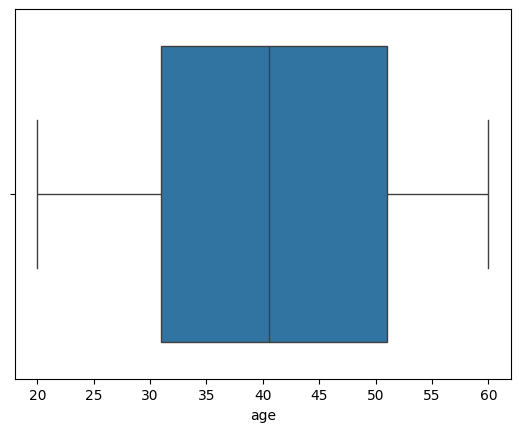

In [ ]:
# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['age'])
plt.show()

In [ ]:
# IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outlier_iqr = df[(df['age'] < batas_bawah) | (df['age'] > batas_atas)]
outlier_iqr

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction


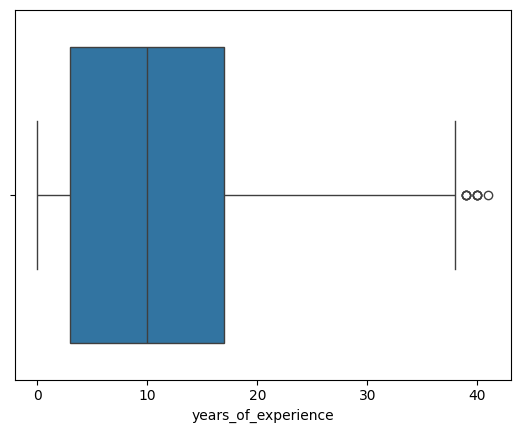

In [ ]:
# Boxplot
sns.boxplot(x=df['years_of_experience'])
plt.show()

In [ ]:
# IQR
Q1 = df['years_of_experience'].quantile(0.25)
Q3 = df['years_of_experience'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outlier_iqr = df[(df['years_of_experience'] < batas_bawah) | (df['years_of_experience'] > batas_atas)]
outlier_iqr

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
135,FL250136,Thomas Ingram,male,60.0,South Africa,Afrikaans,Cybersecurity,39.0,75.0,1.4,0,70.000000
326,FL250326,Jennifer Allen,female,58.0,Spain,Spanish,Data Analysis,40.0,75.0,3.4,1,100.000000
560,FL250560,Rodney Wilson,male,60.0,Argentina,Spanish,Graphic Design,39.0,75.0,4.0,0,70.000000
602,FL250602,Ryan Ewing,male,60.0,United States,English,AI,39.0,100.0,1.5,0,88.000000
630,FL250630,Angela Blackwell,female,60.0,Turkey,Turkish,Web Development,41.0,40.0,4.9,1,66.000000
761,FL250761,John White,male,60.0,China,Mandarin,DevOps,40.0,50.0,4.6,1,100.000000
954,FL250954,Miss Kimberly Marshall,female,59.0,United Kingdom,English,Data Analysis,40.0,40.0,2.5,1,70.000000
965,FL250965,Latoya Brown,female,59.0,United Kingdom,English,UI/UX Design,40.0,100.0,2.6,0,79.269417
986,FL250986,Bradley Wu,male,60.0,Spain,Spanish,Blockchain Development,39.0,20.0,1.4,1,86.000000


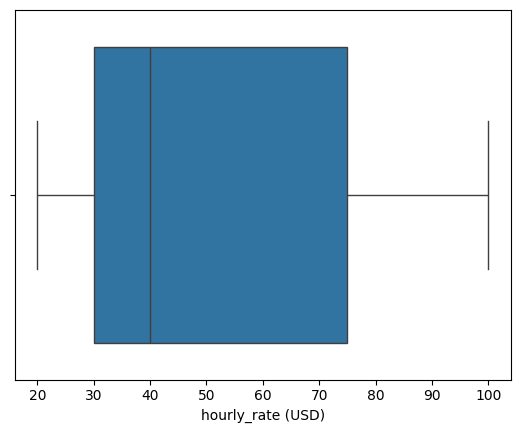

In [ ]:
# Boxplot
sns.boxplot(x=df['hourly_rate (USD)'])
plt.show()

In [ ]:
# IQR
Q1 = df['hourly_rate (USD)'].quantile(0.25)
Q3 = df['hourly_rate (USD)'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outlier_iqr = df[(df['hourly_rate (USD)'] < batas_bawah) | (df['hourly_rate (USD)'] > batas_atas)]
outlier_iqr

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction


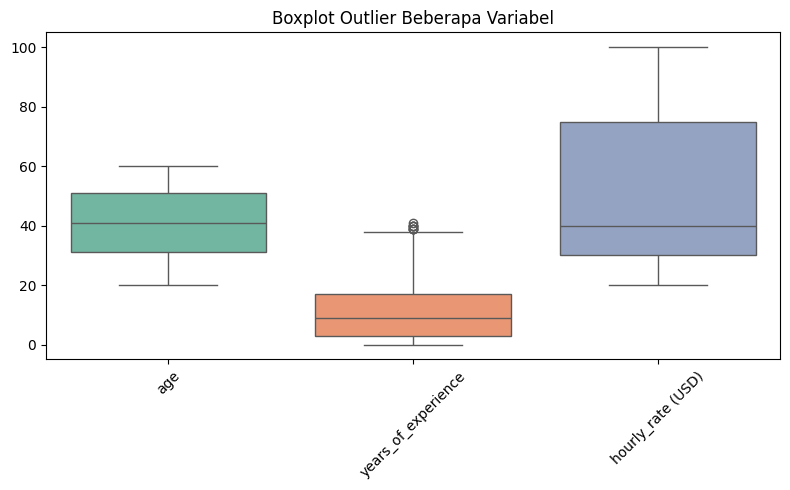

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# pilih kolom yang mau dicek
kolom_numerik = ['age', 'years_of_experience', 'hourly_rate (USD)']

plt.figure(figsize=(8,5))
sns.boxplot(data=df[kolom_numerik], orient='v', palette='Set2')
plt.title('Boxplot Outlier Beberapa Variabel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **9. Korelasi**

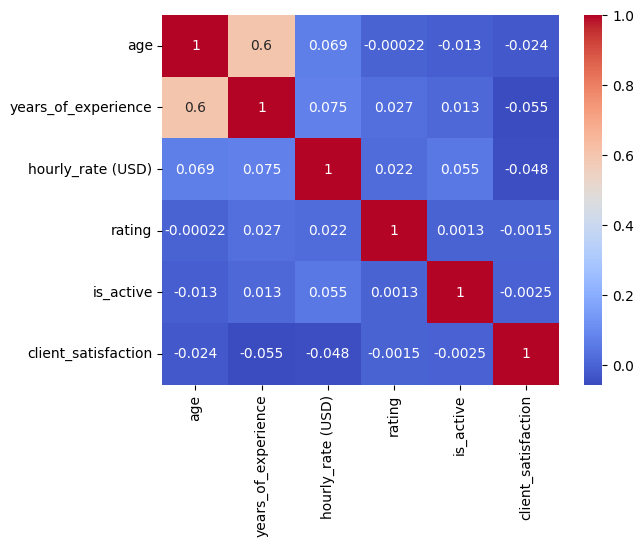

In [ ]:
# Melihat matriks korelasi
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

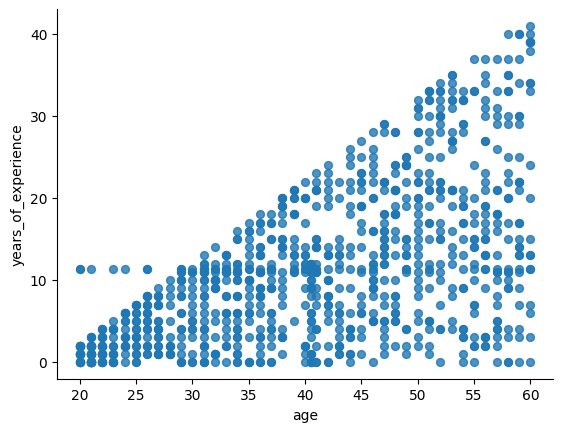

In [ ]:
# @title age vs years_of_experience

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='years_of_experience', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **9. Analisis Lainnya**

### Cek Jenis Kelamin Freelancer

In [ ]:
df['gender'].value_counts()

,count
gender,
male,510
female,490


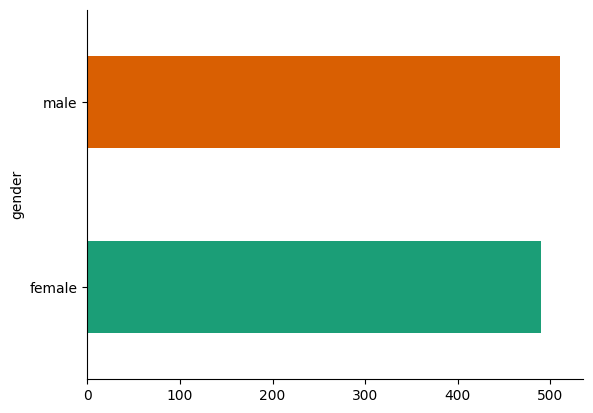

In [ ]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Cek Pekerjaan Freelancer yang paling banyak

In [ ]:
# cek statiscial summary
df['primary_skill'].describe()

,primary_skill
count,1000
unique,10
top,DevOps
freq,112


### Cek Daftar Negara

In [ ]:
# Mengetahui negara apa saja yang ada
unique_country = df['country'].unique()
unique_country

# Mengetahui jumlah data dari masing-masing negara
df['country'].value_counts()

,count
country,
South Korea,68
Canada,65
Germany,52
Netherlands,51
Australia,51
Mexico,50
United Kingdom,50
United States,49
China,49


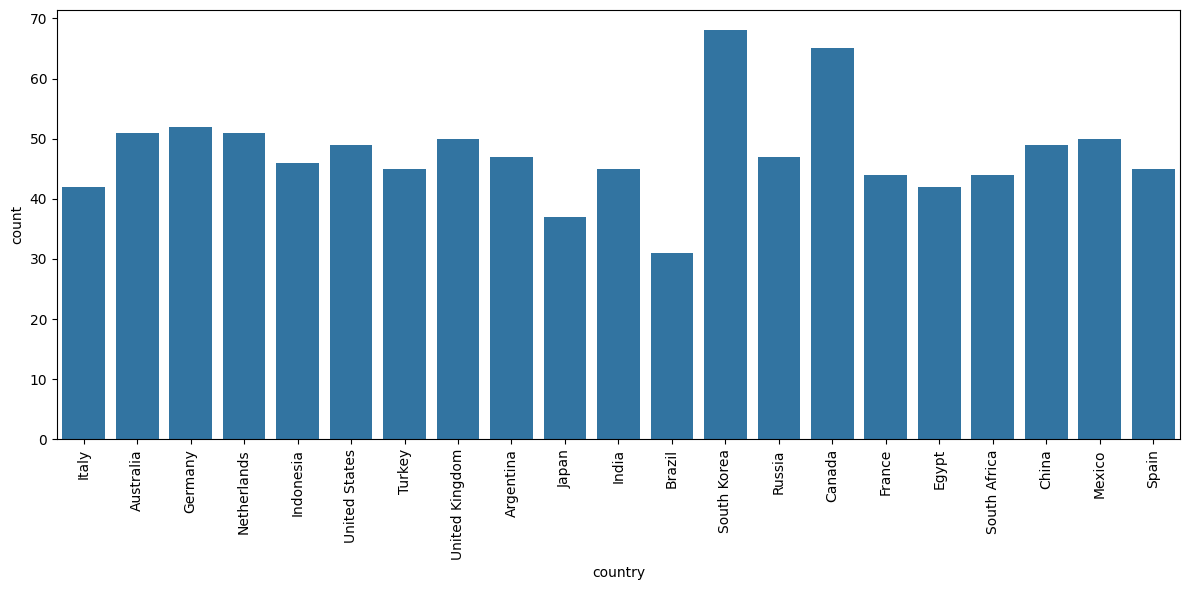

In [ ]:
# Grafik jumlah negara
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x=df['country'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Cek Negara dengan Freelancer DevOps terbanyak

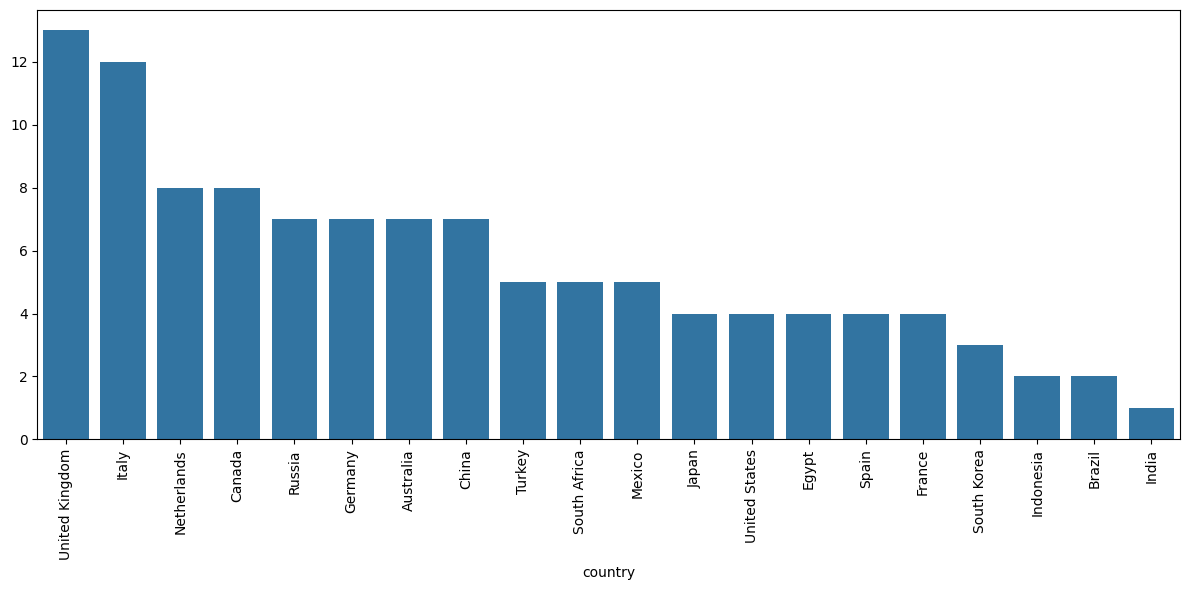

In [ ]:
# filter hanya baris dengan job_title = 'DevOps'
devops_df = df[df['primary_skill'] == 'DevOps']

# hitung jumlah DevOps per negara
counts_devops = devops_df['country'].value_counts()

# grafik
plt.figure(figsize=(12,6))
sns.barplot(x=counts_devops.index, y=counts_devops.values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Negara tanpa DevOps
no_devops_countries = all_countries - devops_countries

print("Negara yang tidak memiliki freelancer DevOps:")
print(no_devops_countries)


Negara yang tidak memiliki freelancer DevOps:
{'Argentina'}
